In [20]:
import subprocess

In [21]:
from sklearn.impute import SimpleImputer
import numpy as np

X = np.array([[1, 2], [np.nan, 3], [7, 6]])

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

print(X_imputed)

[[1. 2.]
 [4. 3.]
 [7. 6.]]


In [22]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.array([[2, 3]])

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

print(X_poly)


[[ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Score
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 1.0


(np.float64(0.9583333333333334), 3)


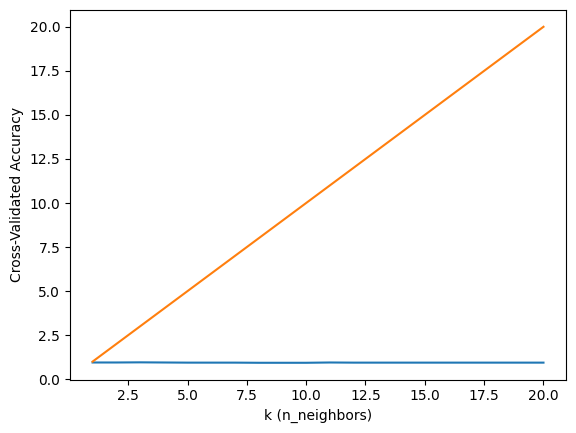

In [24]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv=5).mean()
    accuracies.append((score,k))
print(max(accuracies))
plt.plot(range(1, 21), accuracies)
plt.xlabel("k (n_neighbors)")
plt.ylabel("Cross-Validated Accuracy")
plt.show()


In [25]:
import pandas as pd
# from sklearn.model_selection import LogisticRegression
regression =pd.read_csv("regression.csv")
regression

,Age,Income,StudyHours,Passed
0,56,69376,8,0
1,46,65587,3,1
2,32,56976,20,1
3,60,87584,1,1
4,25,98477,3,1
...,...,...,...,...
995,23,59443,7,1
996,43,119259,8,1
997,21,59063,14,1
998,36,100818,14,1


c:\Users\HELLO\Desktop\scikit learn practice\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HELLO\Desktop\scikit learn practice\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

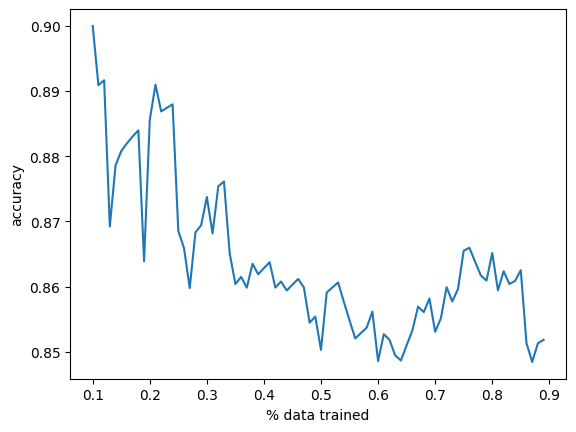

0.9
0.1


In [26]:
i=0.1
j=0.01
accuracies_=[]
while(i<0.9):
    model1=LogisticRegression()
    xtrain,xtest,ytrain,ytest=train_test_split(regression[["Age","Income","StudyHours"]],regression["Passed"],test_size=i,random_state=42)
    model1.fit(xtrain,ytrain)
    model1.predict(xtest)
    score=model1.score(xtest,ytest)
    accuracies_.append((i,score))
    i+=j
plt.xlabel("% data trained")
plt.ylabel("accuracy")
A=list(x[0] for x in accuracies_)
B=list(y[1] for y in accuracies_)
plt.plot(A,B)
plt.show()
print(max(B))
print(A[B.index(max(B))])

[[ 0.55942643  2.38869353]
 [ 1.31217492 -0.7173148 ]
 [-1.5598485  -1.92487377]
 [-2.2813861  -0.1368559 ]
 [ 1.56070438 -0.42795824]
 [-0.80804463  1.19664076]
 [-0.27062383 -2.25553963]
 [ 0.480502    0.54914434]
 [-1.20757158 -1.26898369]
 [ 0.25415746 -1.79532002]
 [ 2.59123946  0.24472415]
 [ 0.07123641  0.49429823]
 [-1.17762637 -1.20592943]
 [ 0.93343952  0.68811892]
 [ 1.65214494 -0.35885569]
 [-1.40735658 -1.56826626]
 [ 1.02255619 -1.08324727]
 [-0.81680628 -0.6795874 ]
 [ 1.50575249 -0.38919817]
 [-2.17105282 -0.04862909]
 [ 0.71479373 -1.42922002]
 [-0.15013844 -0.11708689]
 [-1.4117586  -1.5332749 ]
 [-2.58590856 -0.40925706]
 [ 0.82600732 -1.05383855]
 [-0.07133524  0.08896214]
 [ 0.6273745  -1.32933233]
 [ 1.65882246 -0.43131517]
 [ 1.2798899   1.25896077]
 [ 0.25058844  0.13979096]
 [-0.05319823  1.85605469]
 [-2.05832072 -2.52343407]
 [-2.02632079  0.06194498]
 [-1.65830375 -1.57127256]
 [ 1.28008347  1.28938375]
 [ 0.96423311  0.55600276]
 [-1.87653774  0.23085877]
 

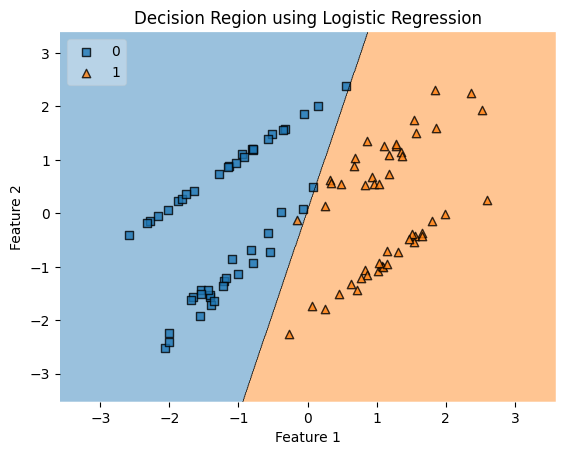

In [27]:
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Generate dummy data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, random_state=42)
print(X,y)
# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot the decision boundary
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region using Logistic Regression')
plt.show()


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import ConfusionMatrixDisplay
# We'll use Iris dataset for multi-class classification
X, y = load_iris(return_X_y=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
ytest,y_pred


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


(521    1
 737    1
 740    1
 660    1
 411    1
       ..
 791    1
 52     1
 878    1
 337    1
 748    1
 Name: Passed, Length: 891, dtype: int64,
 array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
        0]))

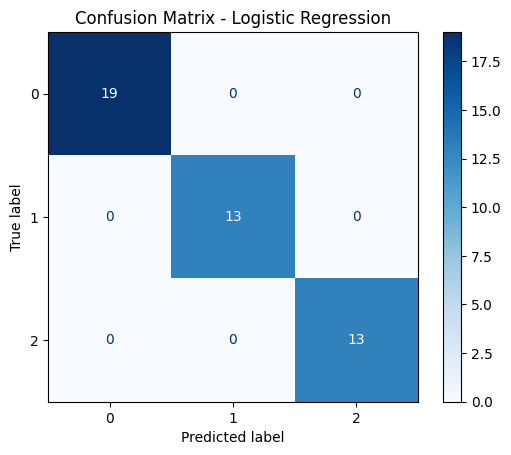

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


In [32]:
print(classification_report(y_test, y_pred))
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {acc}")
print(f"Precision (macro): {prec}")
print(f"Recall (macro): {rec}")
print(f"F1-score (macro): {f1}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1-score (macro): 1.0


In [33]:
data=pd.read_csv("features.csv")
data

,Feature1,Feature2,Feature3,Feature4,Feature5,Output
0,54.967142,36.996777,1,45.785114,-0.372319,1
1,48.617357,34.623168,0,33.784864,0.437313,1
2,56.476885,30.298152,1,28.479964,0.185176,1
3,65.230299,26.765316,0,53.473573,0.425445,1
4,47.658466,33.491117,0,34.168038,0.222290,1
...,...,...,...,...,...,...
995,47.188997,35.350751,1,65.745097,-2.426392,0
996,67.976865,29.867394,0,47.007143,-2.386930,0
997,56.408429,25.590627,0,48.473781,-0.495878,1
998,44.288210,29.184665,0,39.725620,1.097300,1


In [34]:
from sklearn.preprocessing import *
scaler=MaxAbsScaler()
scaler.fit(data)
data=scaler.transform(data)
data

array([[ 0.62090601,  0.80488076,  1.        ,  0.45803347, -0.11480369,
         1.        ],
       [ 0.54917917,  0.75324189,  0.        ,  0.33798318,  0.13484448,
         1.        ],
       [ 0.63796   ,  0.65914929,  1.        ,  0.28491306,  0.05709844,
         1.        ],
       ...,
       [ 0.63718671,  0.55673507,  0.        ,  0.48493084, -0.15290285,
         1.        ],
       [ 0.50027735,  0.63492491,  0.        ,  0.3974144 ,  0.3383499 ,
         1.        ],
       [ 0.62947609,  0.57163449,  0.        ,  0.60805068, -0.48276384,
         0.        ]], shape=(1000, 6))

In [35]:
from sklearn.model_selection import *
from sklearn.linear_model import *
model2=LinearRegression()
binary_data=pd.read_csv("binary_features_dataset.csv")
binary_data

FileNotFoundError: [Errno 2] No such file or directory: 'binary_features_dataset.csv'

In [ ]:
scaler=MinMaxScaler()
scaler.fit(binary_data)
data=scaler.transform(binary_data)
pd.DataFrame(data,columns=[binary_data.columns])

,Feature1,Feature2,Feature3,Feature4,Feature5,Output
0,0.0,1.0,0.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0
996,0.0,1.0,0.0,1.0,1.0,1.0
997,1.0,0.0,0.0,1.0,0.0,0.0
998,1.0,0.0,1.0,1.0,1.0,1.0


In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 0, 1, 0, 1, 0, 1]  
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]  

cm = confusion_matrix(y_true, y_pred)
print(cm)


[[3 1]
 [1 3]]


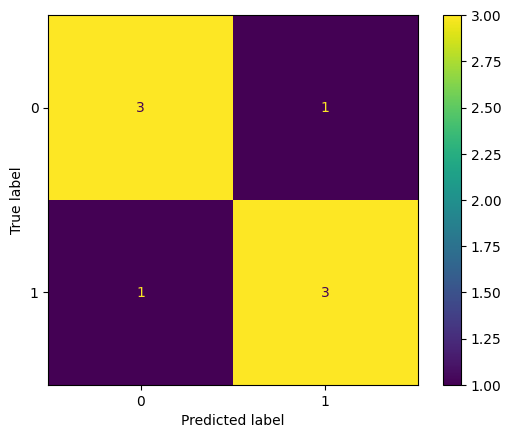

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(cm).plot()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)


0.75

In [ ]:
import pandas as pd
data=pd.read_csv("matrix.csv")
data

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0,1,0,0,0,2
1,1,0,0,0,1,3
2,0,0,0,0,1,4
3,0,1,1,1,0,2
4,1,0,1,1,1,0
...,...,...,...,...,...,...
995,1,0,0,1,1,2
996,1,0,0,1,1,2
997,0,0,0,0,1,1
998,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import *
from sklearn.linear_model import *
model4=LogisticRegression()
x1,x2,y1,y2=train_test_split(data[["feature_1","feature_2","feature_3","feature_4","feature_5"]],data["target"],test_size=0.2,random_state=42)
x1,x2,y1,y2

(     feature_1  feature_2  feature_3  feature_4  feature_5
 29           0          0          0          0          1
 535          0          0          1          0          0
 695          0          0          0          1          1
 557          1          1          0          1          1
 836          0          0          0          0          1
 ..         ...        ...        ...        ...        ...
 106          0          1          0          0          0
 270          1          1          0          1          1
 860          1          1          1          1          0
 435          0          1          1          0          1
 102          0          1          0          1          1
 
 [800 rows x 5 columns],
      feature_1  feature_2  feature_3  feature_4  feature_5
 521          0          1          0          1          1
 737          1          0          1          1          1
 740          0          1          1          1          0
 660         

In [ ]:
model4.fit(x1,y1)
ypredicted=model4.predict(x2)
model4.score(x2,y2)

0.18

In [ ]:
matrix=confusion_matrix(y2,ypredicted)

In [ ]:
matrix

array([[14,  8, 19,  0,  6],
       [10,  9, 11,  0,  8],
       [11, 11,  8,  0,  3],
       [ 8, 13, 13,  0,  3],
       [21, 11,  8,  0,  5]])

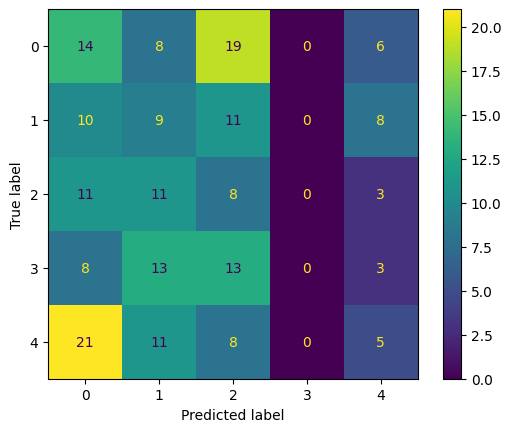

In [ ]:
ConfusionMatrixDisplay(matrix).plot()
plt.savefig("confusionmatrix.jpeg")
plt.show()

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix
print(confusion_matrix(y_true, y_pred))
print("Recall Score:", recall_score(y_true, y_pred))

[[3 1]
 [1 3]]
Recall Score: 0.75


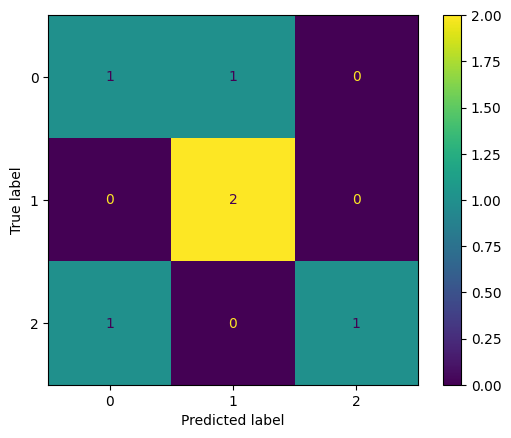

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = [0, 0, 1, 1, 2, 2]
y_pred = [0, 1, 1, 1, 2, 0]

cmatrix=confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cmatrix).plot()
plt.savefig("confusion_matrix.pdf")
plt.show()
# from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
